In [1]:
%reload_ext autoreload
%autoreload 2

import os, psutil

from rocket_fft import numpy_like, scipy_like

numpy_like()

os.environ['NUMEXPR_MAX_THREADS'] = '20'
os.environ['NUMBA_DEBUGINFO'] = '0'

from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune
import alphatims.bruker as bruker

#from alphabase.spectral_library.flat import SpecLibFlat
from alphabase.spectral_library.base import SpecLibBase
#from alphabase.spectral_library.reader import LibraryReaderBase

from alphadia.extraction.planning import Plan, Workflow
from alphadia.extraction.calibration import RunCalibration
from alphadia.extraction.candidateselection import MS1CentricCandidateSelection
from alphadia.extraction.scoring import fdr_correction, MS2ExtractionWorkflow
import alphadia.extraction.utils as utils
yaml_file = 'config.yaml'

raw_files = ['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_AID8_05_S4-F5_1_652.d']

output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')


0:00:02.125326  WARNING: WARNING: Temp mmap arrays are written to /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/temp_mmap_l5pbycye. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 1,114,007,048,192
0:00:02.164373  WARNING: WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
0:00:02.164768  INFO: 


In [16]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_shared_eg_n_fragments.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)


#test_lib.precursor_df.elution_group_idx = np.arange(len(test_lib.precursor_df))

0:20:17.201240  PROGRESS:       _   _      _         ___ ___   _   
0:20:17.202111  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:20:17.202445  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:20:17.202823  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:20:17.203058  PROGRESS:            |_|                            
0:20:17.203251  PROGRESS: 
0:20:17.203616  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:20:17.208910  INFO: Applying config update from dict
0:20:17.209305  PROGRESS: version: 1.0.2
0:20:17.209506  PROGRESS: hostname: PCMANN428.biochem.mpg.de
0:20:17.209710  PROGRESS: date: 2023-04-19 16:31:44
0:20:20.222622  INFO: renaming precursor_columns columns
0:20:20.223492  INFO: renaming fragment_columns columns
0:20:20.223823  INFO: ========= Library Stats =========
0:20:20.224120  INFO: Number of precursors: 275,196
0:20:20.251245  INFO: 	thereof targets:137,601
0:20:20.25

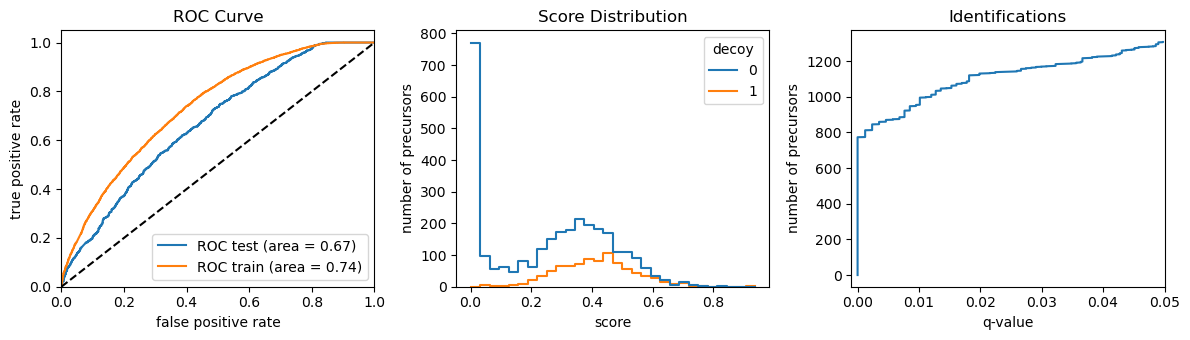

0:23:34.448330  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:23:34.448724  PROGRESS: Accumulated precursors: 3,898, 0.01 FDR: 955, 0.001 FDR: 774
0:23:34.449784  INFO: calibration group: precursor, fitting mz estimator 


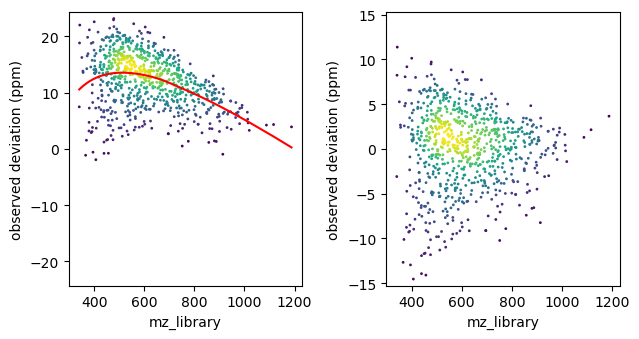

0:23:34.544232  INFO: calibration group: precursor, fitting rt estimator 


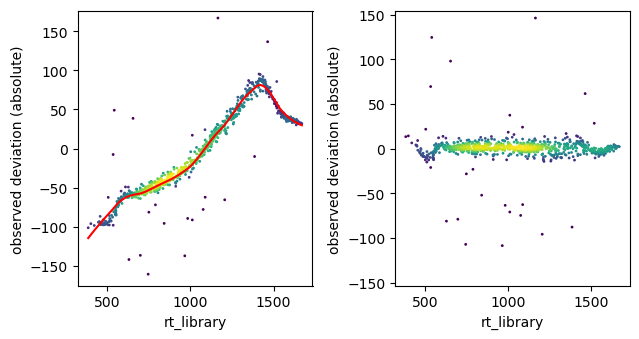

0:23:34.635704  INFO: calibration group: precursor, fitting mobility estimator 


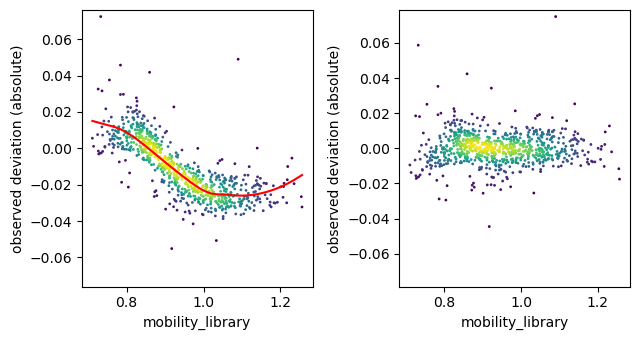

0:23:34.738073  INFO: calibration group: fragment, fitting mz estimator 


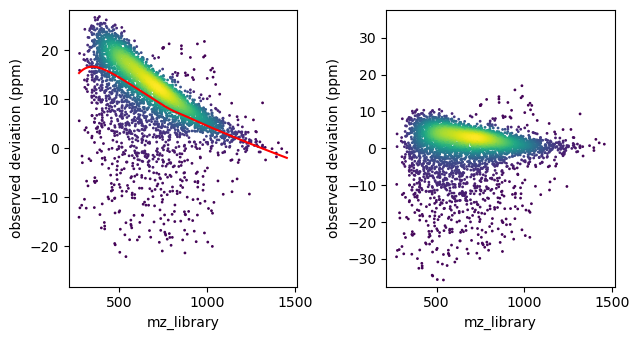

0:23:35.006984  INFO: calibration group: precursor, predicting mz
0:23:35.016581  INFO: calibration group: precursor, predicting rt
0:23:35.041609  INFO: calibration group: precursor, predicting mobility
0:23:35.053985  INFO: calibration group: fragment, predicting mz
0:23:35.396990  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:23:35.401381  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:23:42.836007  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:23:42.836401  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:23:42.836636  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:23:42.836832  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 14350/14350 [00:01<00:00, 12989.38it/s]
0:24:04.029681  INFO: Scored 14350 candidates
0:24:04.034608  INFO: 2.52% of targets failed, 6.43% of decoys failed
0:24:04.121482  INFO: number of dfs in features: 1, to

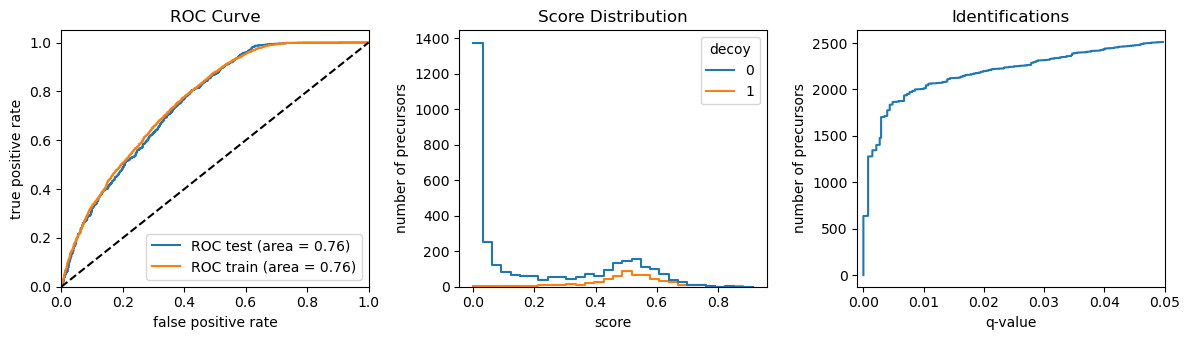

0:24:04.721815  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:24:04.722210  PROGRESS: Accumulated precursors: 3,874, 0.01 FDR: 2,005, 0.001 FDR: 1,278
0:24:04.723094  INFO: calibration group: precursor, fitting mz estimator 


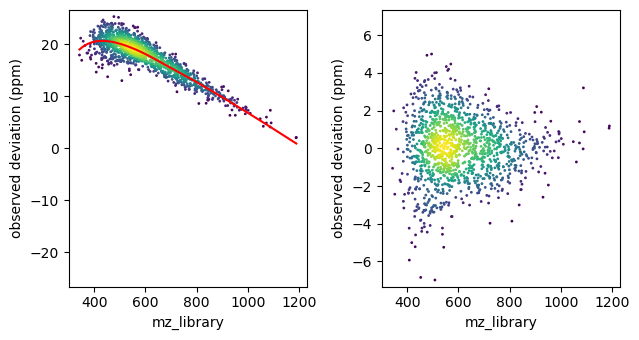

0:24:04.835191  INFO: calibration group: precursor, fitting rt estimator 


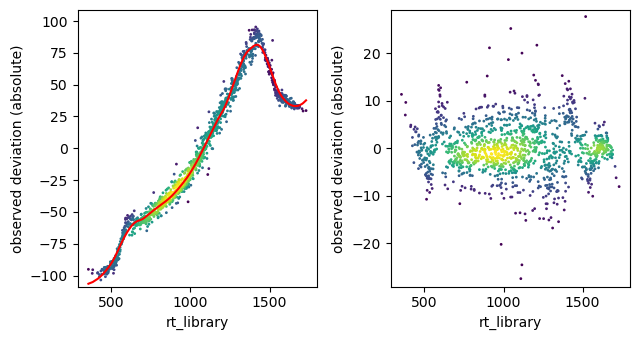

0:24:04.944235  INFO: calibration group: precursor, fitting mobility estimator 


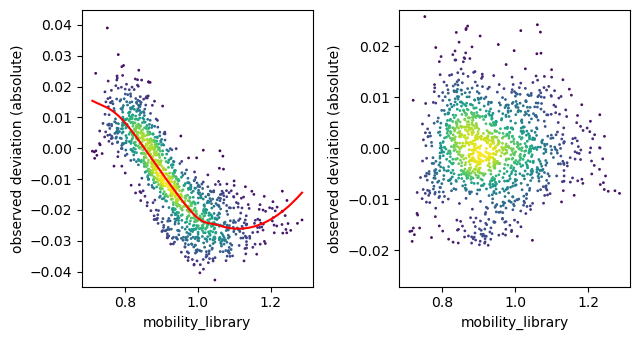

0:24:05.062620  INFO: calibration group: fragment, fitting mz estimator 


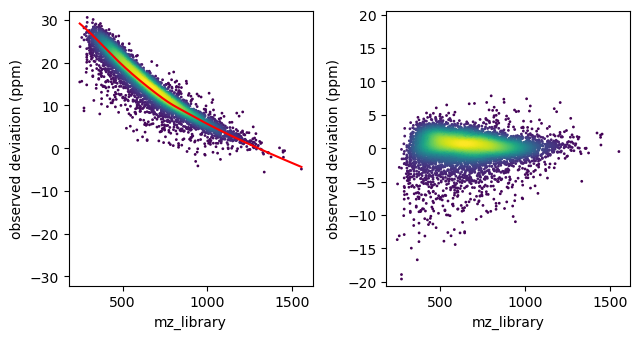

0:24:05.594371  INFO: calibration group: precursor, predicting mz
0:24:05.603913  INFO: calibration group: precursor, predicting rt
0:24:05.629172  INFO: calibration group: precursor, predicting mobility
0:24:05.641920  INFO: calibration group: fragment, predicting mz
0:24:05.978239  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:24:05.982809  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:24:13.295273  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:24:13.295673  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:24:13.295931  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:24:13.296107  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 14293/14293 [00:01<00:00, 12960.40it/s]
0:24:34.690822  INFO: Scored 14293 candidates
0:24:34.695479  INFO: 2.11% of targets failed, 5.21% of decoys failed
0:24:34.781615  INFO: number of dfs in features: 1, to

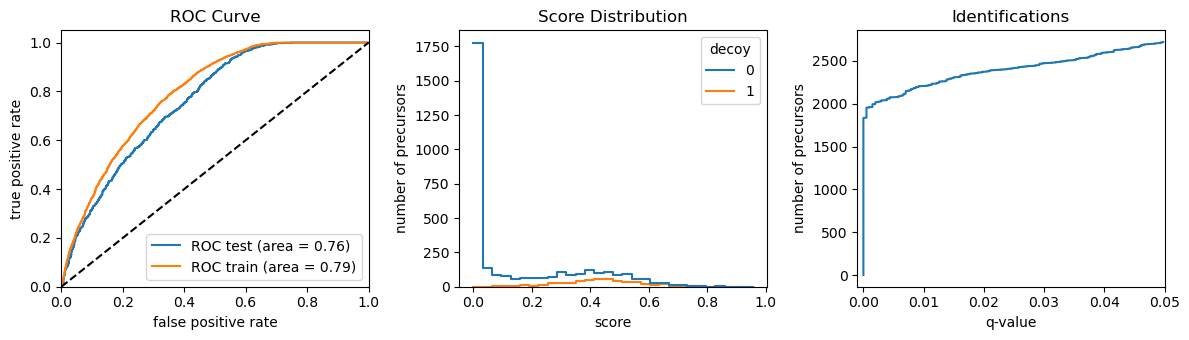

0:24:35.914827  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:24:35.915120  PROGRESS: Accumulated precursors: 3,898, 0.01 FDR: 2,206, 0.001 FDR: 1,955
0:24:35.916014  INFO: calibration group: precursor, fitting mz estimator 


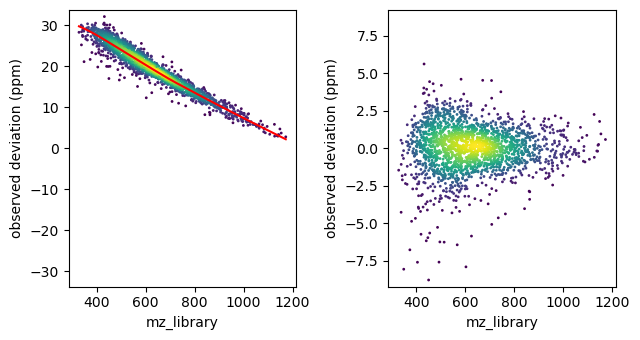

0:24:36.053595  INFO: calibration group: precursor, fitting rt estimator 


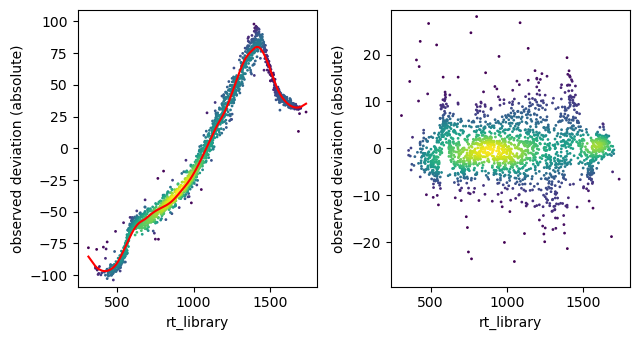

0:24:36.190549  INFO: calibration group: precursor, fitting mobility estimator 


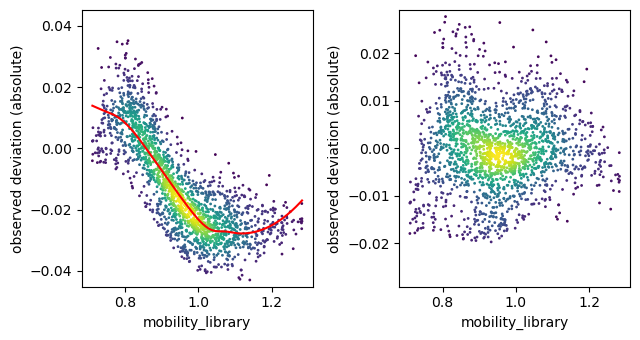

0:24:36.329230  INFO: calibration group: fragment, fitting mz estimator 


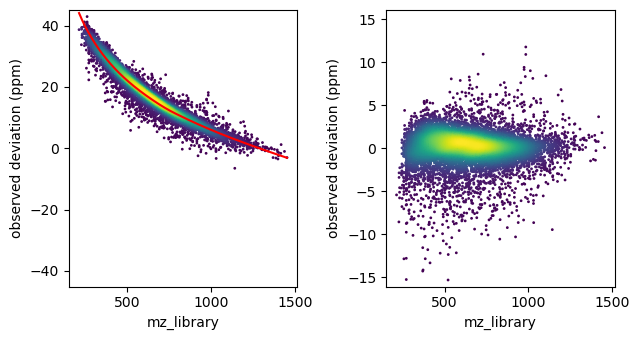

0:24:37.344059  INFO: calibration group: precursor, predicting mz
0:24:37.355398  INFO: calibration group: precursor, predicting rt
0:24:37.410370  INFO: calibration group: precursor, predicting mobility
0:24:37.423069  INFO: calibration group: fragment, predicting mz
0:24:37.754437  PROGRESS: === Epoch 3, step 0, extracting elution groups 0 to 4000 ===
0:24:37.759171  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:24:45.116818  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:24:45.117221  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:24:45.117496  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:24:45.117697  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 14317/14317 [00:01<00:00, 12898.47it/s]
0:25:06.496693  INFO: Scored 14317 candidates
0:25:06.501293  INFO: 2.07% of targets failed, 5.17% of decoys failed
0:25:06.592054  INFO: number of dfs in features: 1, to

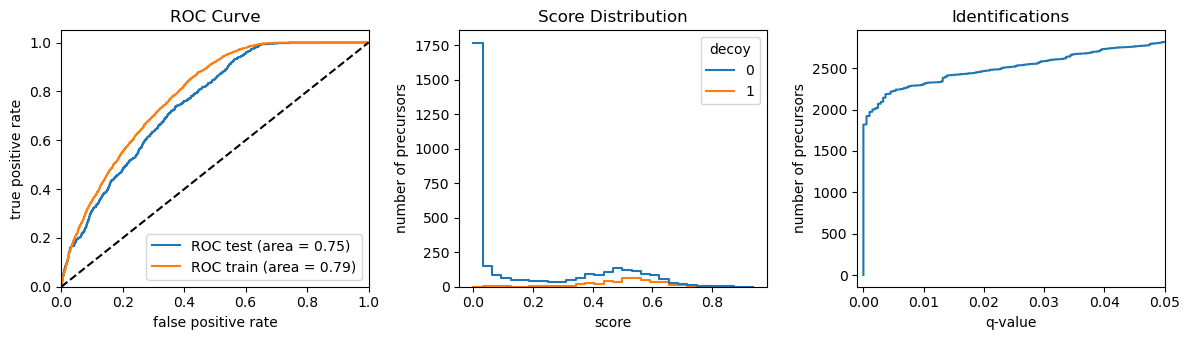

0:25:07.582139  PROGRESS: === checking if recalibration conditions were reached, target 800 precursors ===
0:25:07.582497  PROGRESS: Accumulated precursors: 3,889, 0.01 FDR: 2,302, 0.001 FDR: 1,921
0:25:07.583215  INFO: calibration group: precursor, fitting mz estimator 


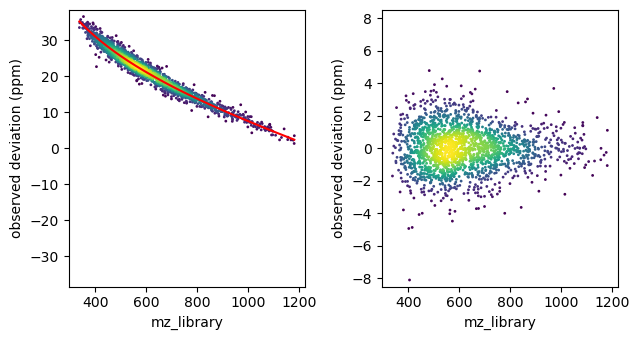

0:25:07.723799  INFO: calibration group: precursor, fitting rt estimator 


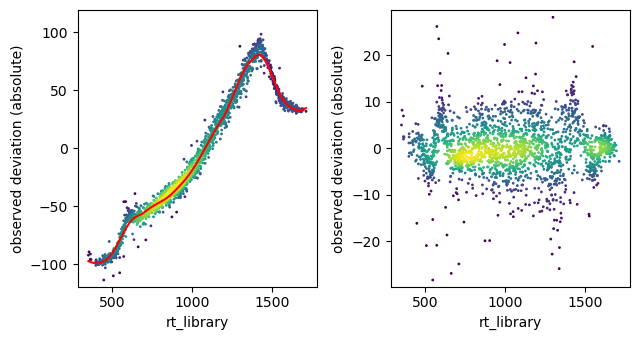

0:25:07.854080  INFO: calibration group: precursor, fitting mobility estimator 


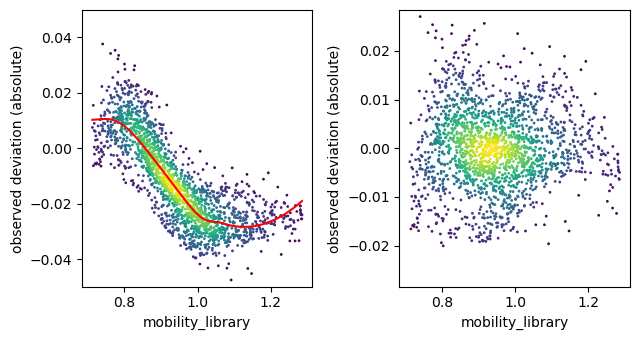

0:25:07.994920  INFO: calibration group: fragment, fitting mz estimator 


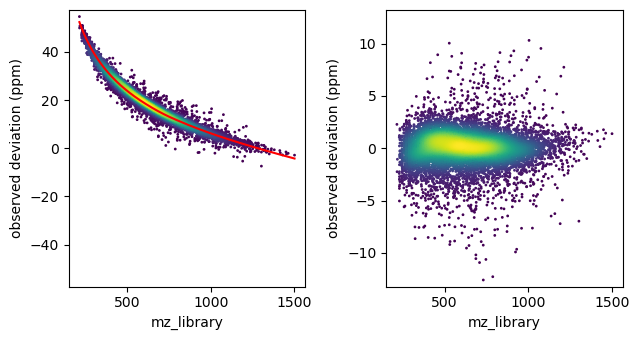

0:25:09.029910  INFO: calibration group: precursor, predicting mz
0:25:09.039931  INFO: calibration group: precursor, predicting rt
0:25:09.093504  INFO: calibration group: precursor, predicting mobility
0:25:09.109588  INFO: calibration group: fragment, predicting mz
0:25:09.445022  PROGRESS: === Epoch 4, step 0, extracting elution groups 0 to 4000 ===
0:25:09.448834  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:25:16.860934  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:25:16.861347  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:25:16.861580  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:25:16.861787  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 14329/14329 [00:01<00:00, 12881.26it/s]
0:25:38.125778  INFO: Scored 14329 candidates
0:25:38.130706  INFO: 1.85% of targets failed, 5.55% of decoys failed
0:25:38.217599  INFO: number of dfs in features: 1, to

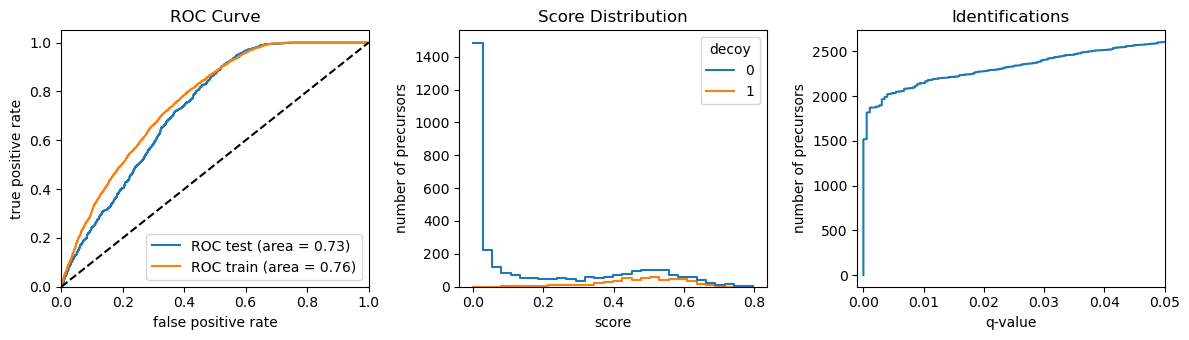

0:25:38.796356  PROGRESS: === checking if recalibration conditions were reached, target 1000 precursors ===
0:25:38.796654  PROGRESS: Accumulated precursors: 3,897, 0.01 FDR: 2,146, 0.001 FDR: 1,817
0:25:38.797431  INFO: calibration group: precursor, fitting mz estimator 


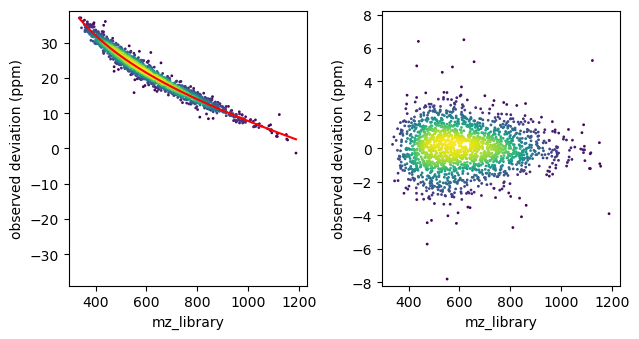

0:25:38.933624  INFO: calibration group: precursor, fitting rt estimator 


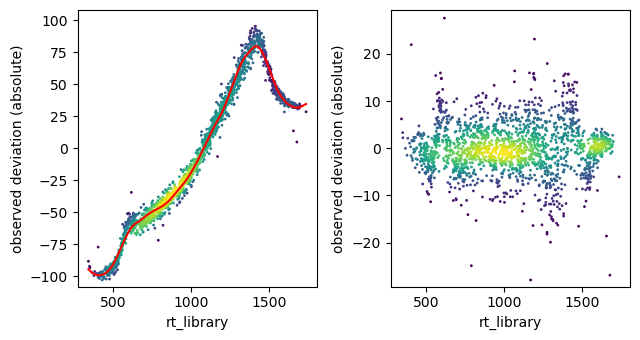

0:25:39.066402  INFO: calibration group: precursor, fitting mobility estimator 


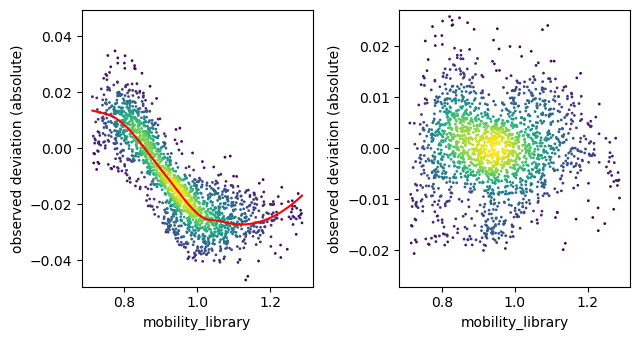

0:25:39.200573  INFO: calibration group: fragment, fitting mz estimator 


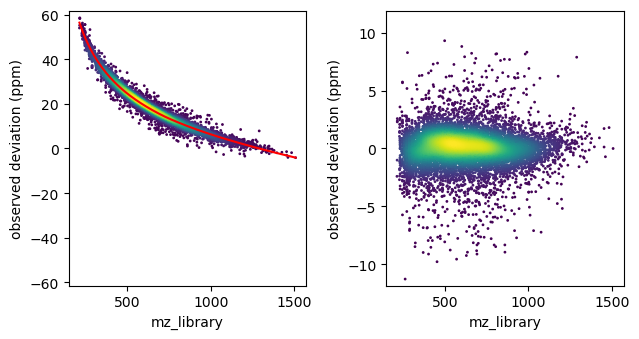

0:25:40.143075  INFO: calibration group: precursor, predicting mz
0:25:40.154185  INFO: calibration group: precursor, predicting rt
0:25:40.187769  INFO: calibration group: precursor, predicting mobility
0:25:40.200384  INFO: calibration group: fragment, predicting mz
0:25:40.537356  INFO: calibration group: precursor, predicting mz
0:25:40.548176  INFO: calibration group: precursor, predicting rt
0:25:40.573022  INFO: calibration group: precursor, predicting mobility
0:25:40.583308  INFO: calibration group: fragment, predicting mz
0:25:40.907548  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:25:49.203577  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:25:49.204053  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:25:49.204287  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:25:49.204529  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 384487/384487 [00:29<00:00, 

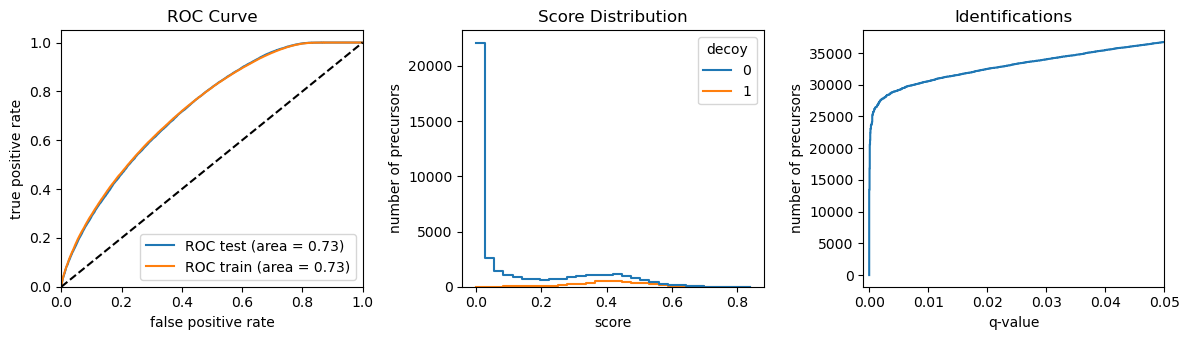

0:32:46.305863  PROGRESS: === extraction finished, 0.05 FDR: 34,997, 0.01 FDR: 30,247, 0.001 FDR: 26,355 ===


In [17]:
plan = Plan(raw_files, config_update = 
            {'extraction':
                {
                    'target_mobility_tolerance': 0.03,
                    'target_rt_tolerance': 30
                }
            }
        )
plan.from_spec_lib_base(test_lib)

#plan.run(output_location, keep_decoys=True, fdr=1.0, neptune_token=neptune_token, neptune_tags='scp')

for dia_data, precursors_flat, fragments_flat in plan.get_run_data():

    precursors_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

    workflow = Workflow(
        plan.config, 
        dia_data, 
        precursors_flat, 
        fragments_flat
        )

    workflow.calibration()
    d0_df = workflow.extraction()
    

In [18]:
output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_07_v1.0.2/precursor_translation'
d0_df.to_csv(os.path.join(output_location, 'd0_df.tsv'), sep='\t')

In [21]:
fragments_flat.cardinality.value_counts()

1    2274633
3     996633
Name: cardinality, dtype: int64

In [22]:
channel_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_shared_eg_n_fragments.hdf'

channel_lib = SpecLibBase()
channel_lib.load_hdf(channel_lib_location, load_mod_seq=True)

In [23]:


plan = Plan(raw_files, config_update = 
            {'extraction':
                {
                    'target_mobility_tolerance': 0.03,
                    'target_rt_tolerance': 30
                }
            }
        )
plan.from_spec_lib_base(channel_lib)

#plan.run(output_location, keep_decoys=True, fdr=1.0, neptune_token=neptune_token, neptune_tags='scp')

for dia_data, precursors_flat, fragments_flat in plan.get_run_data():
    
    break

0:38:05.096237  PROGRESS:       _   _      _         ___ ___   _   
0:38:05.096796  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:38:05.097119  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:38:05.097520  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:38:05.097901  PROGRESS:            |_|                            
0:38:05.098199  PROGRESS: 
0:38:05.098878  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:38:05.104843  INFO: Applying config update from dict
0:38:05.105218  PROGRESS: version: 1.0.2
0:38:05.105844  PROGRESS: hostname: PCMANN428.biochem.mpg.de
0:38:05.106168  PROGRESS: date: 2023-04-19 16:49:32
0:38:08.196505  INFO: renaming precursor_columns columns
0:38:08.197619  INFO: renaming fragment_columns columns
0:38:08.198294  INFO: ========= Library Stats =========
0:38:08.198732  INFO: Number of precursors: 275,196
0:38:08.234139  INFO: 	thereof targets:137,601
0:38:08.23

In [24]:
precursors_d4 = precursors_flat[precursors_flat['channel'] == 4].copy()

In [31]:
d0_df_sig = d0_df[d0_df['elution_group_idx'].isin(d0_df[d0_df['qval'] <=0.01]['elution_group_idx'])].copy()

In [35]:
d0_df_sig.sort_values('elution_group_idx', inplace=True)

In [37]:
precursors_d4 = precursors_d4[precursors_d4['elution_group_idx'].isin(d0_df_sig['elution_group_idx'])].copy()

In [38]:
d0_elution_group_idx = d0_df_sig['elution_group_idx'].values
d4_elution_group_idx = precursors_d4['elution_group_idx'].values
d0_lookup = np.searchsorted(d0_elution_group_idx, d4_elution_group_idx)

In [42]:
precursors_d4['rt_library'] = d0_df_sig['rt_calibrated'].values[d0_lookup]
precursors_d4['mobility_library'] = d0_df_sig['mobility_calibrated'].values[d0_lookup]


In [43]:
precursors_d4

elution_group_idx  precursor_idx  decoy  flat_frag_start_idx  \
2                   10187              9      1              1647275   
4                   27203             12      1              1670867   
9                   27203             16      0               836862   
13                  12519             19      0               670619   
15                  34701             29      1              1658262   
...                   ...            ...    ...                  ...   
275173              36078         275177      1              3270514   
275175              36078         275174      0               948920   
275176              33875         275152      1              3270433   
275191               4731         275192      1              3265987   
275194               4731         275194      0               589938   

        flat_frag_stop_idx  charge   rt_library  mobility_library  \
2                  1647282       2   634.595502          0.849068   
4                  1670873       2  1136.362797          0.851516   
9                   836868       2  1136.362797          0.851516   
13                  670625       2   701.119082          0.853942   
15                 1658269       2  1418.274757          0.884242   
...                    ...     ...          ...               ...   
275173             3270539       5  1468.960217          1.177399   
275175              948945       5  1468.960217          1.177399   
275176             3270461       4  1386.064405          1.266374   
275191             3266006       5   447.426382          1.068086   
275194              589957       5   447.426382          1.068086   

         mz_library                                           sequence  ...  \
2        455.290783                                            LVEEDLK  ...   
4        466.308779                                            FVPLYTK  ...   
9        466.308779                                            FIPLYSK  ...   
13       457.250003                                            FSTELER  ...   
15       472.299299                                            TVYFLLR  ...   
...             ...                                                ...  ...   
275173   982.673971    TDGNIDDSLIGGNASAEGPEGEGTESTVITGVDIVMNHHLQETSFSK  ...   
275175   988.280231    TEGNIDDSLIGGNASAEGPEGEGTESTVITGVDIVMNHHLQETSFTK  ...   
275176  1136.822680    ETQAVVDPPQAASTGAPQSSAVAAAAATTTATTTTTSSGGHPLEFVR  ...   
275191   753.178566  ALSAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAASK  ...   
275194   747.572306  AASAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAATK  ...   

        proteins channel       i_0       i_1       i_2       i_3       i_4  \
2         P12270       4  0.600886  0.291835  0.085447  0.018558  0.003275   
4       Q14694-2       4  0.562654  0.315137  0.097049  0.021411  0.003749   
9       Q14694-2       4  0.562654  0.315137  0.097049  0.021411  0.003749   
13        Q9UH65       4  0.603518  0.290440  0.084556  0.018275  0.003211   
15        P09884       4  0.564730  0.314188  0.096253  0.021141  0.003687   
...          ...     ...       ...       ...       ...       ...       ...   
275173    P13693       4  0.066341  0.167148  0.223611  0.209687  0.153950   
275175    P13693       4  0.066341  0.167148  0.223611  0.209687  0.153950   
275176    P54727       4  0.084289  0.197248  0.242114  0.206522  0.137072   
275191    Q9UKY7       4  0.141394  0.260841  0.256465  0.177225  0.096112   
275194    Q9UKY7       4  0.141394  0.260841  0.256465  0.177225  0.096112   

             i_5  nAA                                           raw_name  
2       0.000000    7  20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_AID8...  
4       0.000000    7  20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_AID8...  
9       0.000000    7  20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_AID8...  
13      0.000000    7  20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_AID8...  
15      0.000000    7  20230103_TIMS05_MCT_SA_HeLa_SM

0:29:36.895429  INFO: found 2 calibration groups
0:29:36.895872  INFO: (fragment) found 1 estimator(s)
0:29:36.896092  INFO: (precursor) found 3 estimator(s)
0:29:36.899244  INFO: calibration group: precursor, predicting mz
0:29:36.899539  WARNING: mz prediction was skipped as it has not been fitted yet
0:29:36.899759  INFO: calibration group: precursor, predicting rt
0:29:36.899957  WARNING: rt prediction was skipped as it has not been fitted yet
0:29:36.900141  INFO: calibration group: precursor, predicting mobility
0:29:36.900315  WARNING: mobility prediction was skipped as it has not been fitted yet
0:29:36.900513  INFO: calibration group: fragment, predicting mz
0:29:36.900703  WARNING: mz prediction was skipped as it has not been fitted yet
0:29:36.900961  PROGRESS: === Epoch 0, step 0, extracting elution groups 0 to 4000 ===
0:29:36.903656  PROGRESS: MS1 error: 30, MS2 error: 30, RT error: 30, Mobility error: 0.03
0:29:43.275116  INFO: Duty cycle consists of 9 frames, 0.96 secon

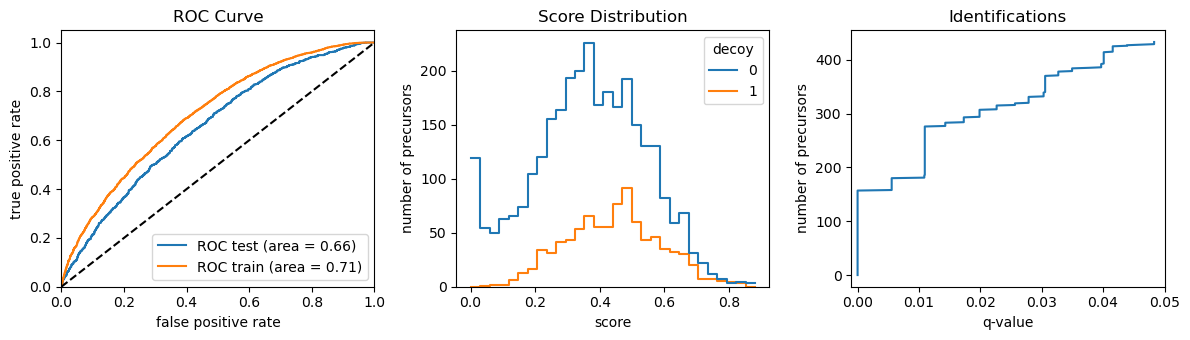

0:30:05.581673  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:30:05.582069  PROGRESS: Accumulated precursors: 3,871, 0.01 FDR: 181, 0.001 FDR: 158
0:30:05.582362  PROGRESS: === Epoch 0, step 1, extracting elution groups 4000 to 8000 ===
0:30:05.584943  PROGRESS: MS1 error: 30, MS2 error: 30, RT error: 30, Mobility error: 0.03
0:30:12.116973  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:30:12.117369  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:30:12.117608  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:30:12.117798  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 14001/14001 [00:01<00:00, 12812.78it/s]
0:30:33.328492  INFO: Scored 14001 candidates
0:30:33.332715  INFO: 1.67% of targets failed, 3.84% of decoys failed
0:30:33.421370  INFO: number of dfs in features: 2, total number of features: 27224


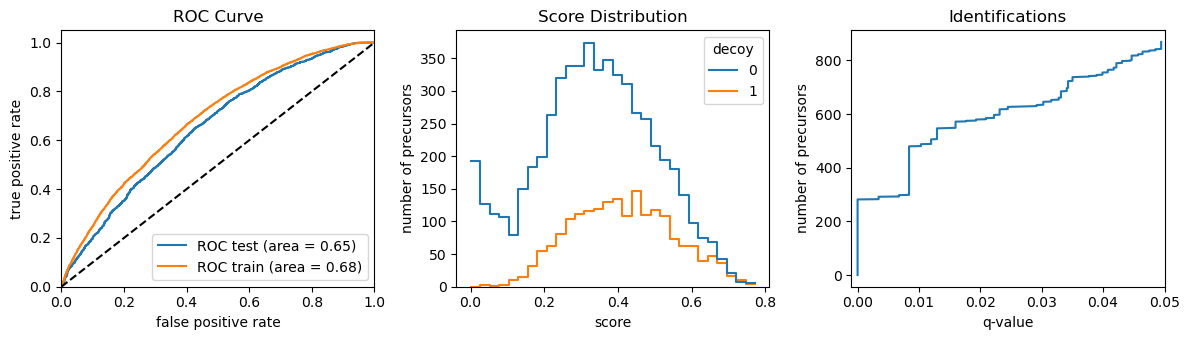

0:30:34.636313  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:30:34.636840  PROGRESS: Accumulated precursors: 7,581, 0.01 FDR: 481, 0.001 FDR: 283
0:30:34.637672  INFO: calibration group: precursor, fitting mz estimator 


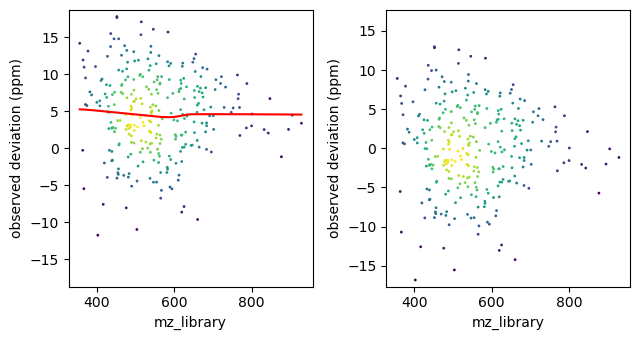

0:30:34.723539  INFO: calibration group: precursor, fitting rt estimator 


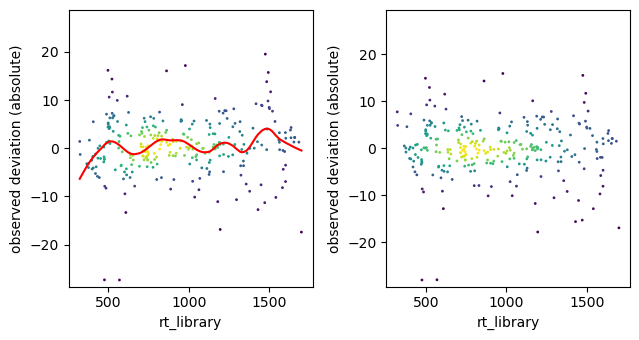

0:30:34.804075  INFO: calibration group: precursor, fitting mobility estimator 


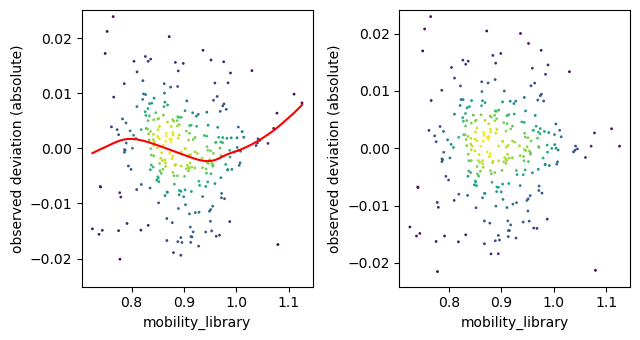

0:30:34.893354  INFO: calibration group: fragment, fitting mz estimator 


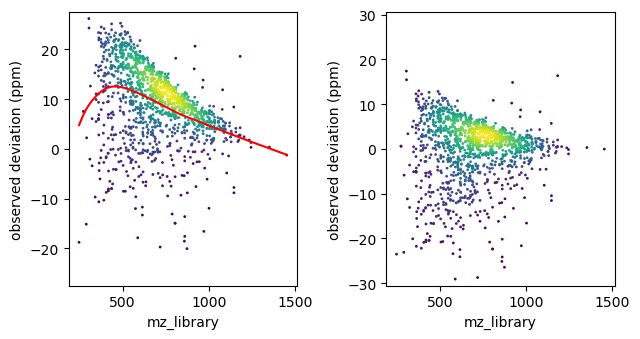

0:30:35.000635  INFO: calibration group: precursor, predicting mz
0:30:35.010657  INFO: calibration group: precursor, predicting rt
0:30:35.033900  INFO: calibration group: precursor, predicting mobility
0:30:35.045936  INFO: calibration group: fragment, predicting mz
0:30:35.388146  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:30:35.391936  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:30:42.722066  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:30:42.722463  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:30:42.722704  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:30:42.722886  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 13951/13951 [00:01<00:00, 12936.10it/s]
0:31:02.557624  INFO: Scored 13951 candidates
0:31:02.561868  INFO: 5.35% of targets failed, 9.45% of decoys failed
0:31:02.643889  INFO: number of dfs in features: 1, to

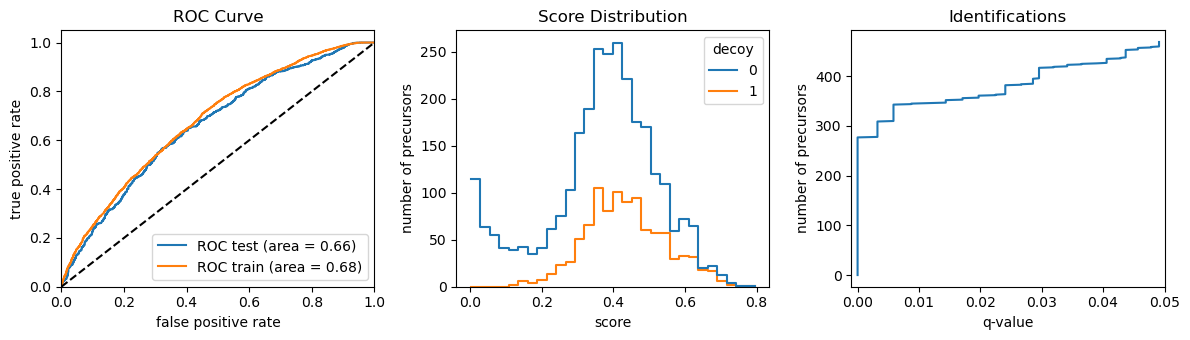

0:31:03.189327  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:31:03.189631  PROGRESS: Accumulated precursors: 3,822, 0.01 FDR: 346, 0.001 FDR: 278
0:31:03.189822  PROGRESS: === Epoch 1, step 1, extracting elution groups 4000 to 8000 ===
0:31:03.192581  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:31:09.761308  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:31:09.761682  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:31:09.761937  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:31:09.762114  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 13944/13944 [00:01<00:00, 12986.21it/s]
0:31:29.322024  INFO: Scored 13944 candidates
0:31:29.326462  INFO: 4.95% of targets failed, 9.81% of decoys failed
0:31:29.405945  INFO: number of dfs in features: 2, total number of features: 25835


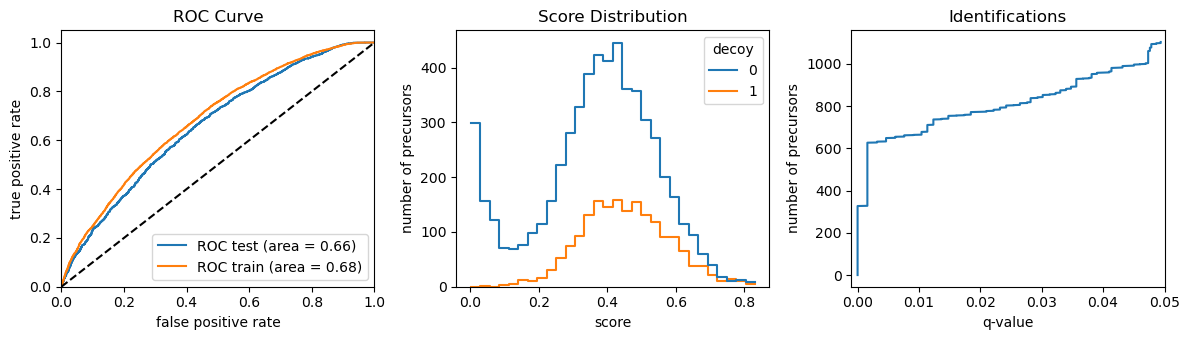

0:31:31.393164  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:31:31.393532  PROGRESS: Accumulated precursors: 7,495, 0.01 FDR: 665, 0.001 FDR: 328
0:31:31.393726  PROGRESS: === Epoch 1, step 2, extracting elution groups 8000 to 12000 ===
0:31:31.396395  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:31:37.895141  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:31:37.895531  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:31:37.895787  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:31:37.895971  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 13941/13941 [00:01<00:00, 12969.70it/s]
0:31:57.946128  INFO: Scored 13941 candidates
0:31:57.950749  INFO: 4.60% of targets failed, 9.63% of decoys failed
0:31:58.033048  INFO: number of dfs in features: 3, total number of features: 38785


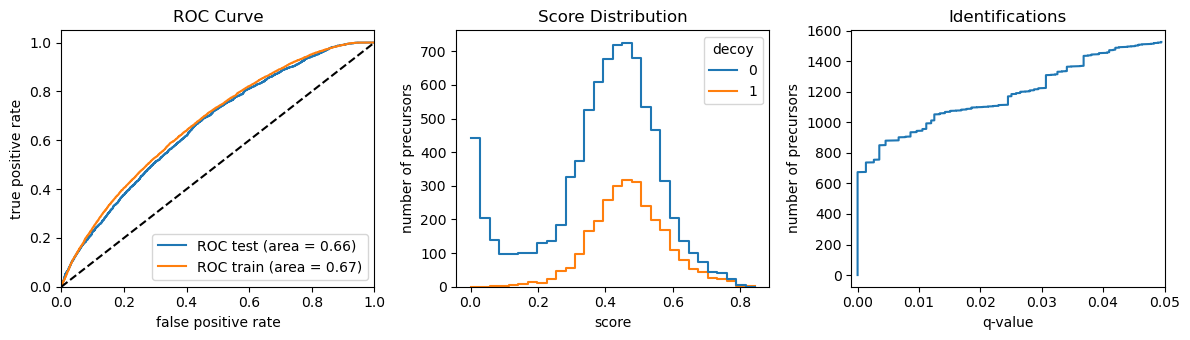

0:31:59.487532  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:31:59.487837  PROGRESS: Accumulated precursors: 10,996, 0.01 FDR: 945, 0.001 FDR: 675
0:31:59.488680  INFO: calibration group: precursor, fitting mz estimator 


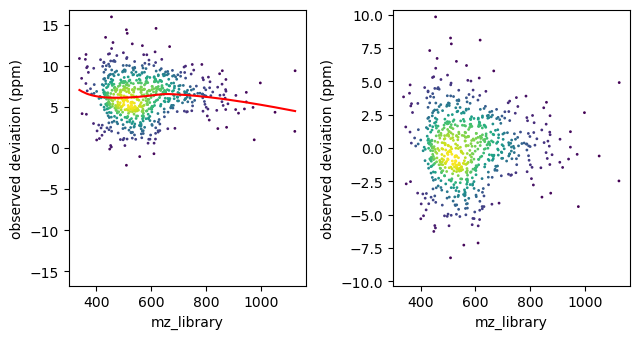

0:31:59.591198  INFO: calibration group: precursor, fitting rt estimator 


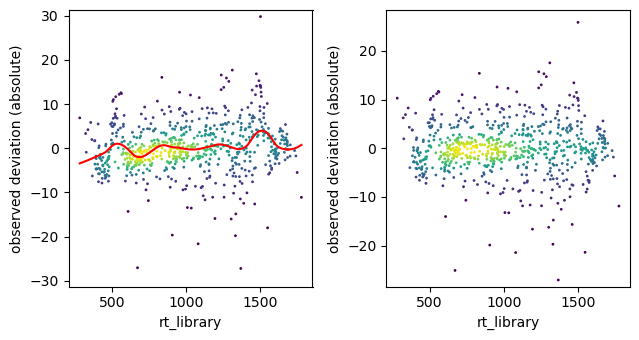

0:31:59.679869  INFO: calibration group: precursor, fitting mobility estimator 


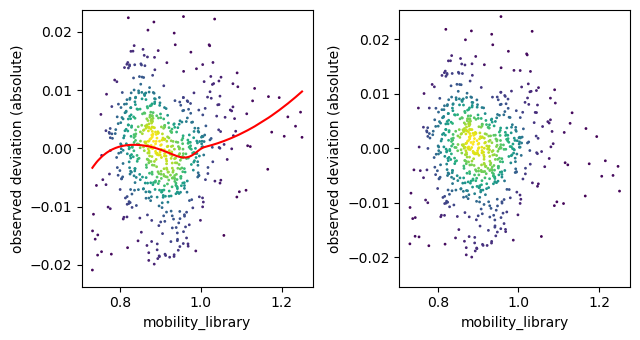

0:31:59.777149  INFO: calibration group: fragment, fitting mz estimator 


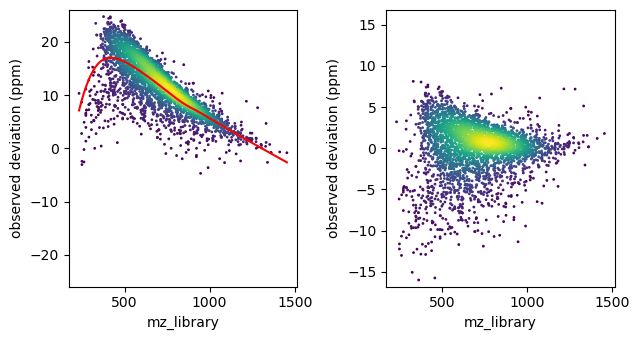

0:31:59.987941  INFO: calibration group: precursor, predicting mz
0:31:59.997698  INFO: calibration group: precursor, predicting rt
0:32:00.024816  INFO: calibration group: precursor, predicting mobility
0:32:00.038917  INFO: calibration group: fragment, predicting mz
0:32:00.398113  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:32:00.402080  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:32:07.700935  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:32:07.701375  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:32:07.701593  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:32:07.701817  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 13852/13852 [00:01<00:00, 12950.29it/s]
0:32:27.326358  INFO: Scored 13852 candidates
0:32:27.330394  INFO: 4.39% of targets failed, 9.97% of decoys failed
0:32:27.409967  INFO: number of dfs in features: 1, to

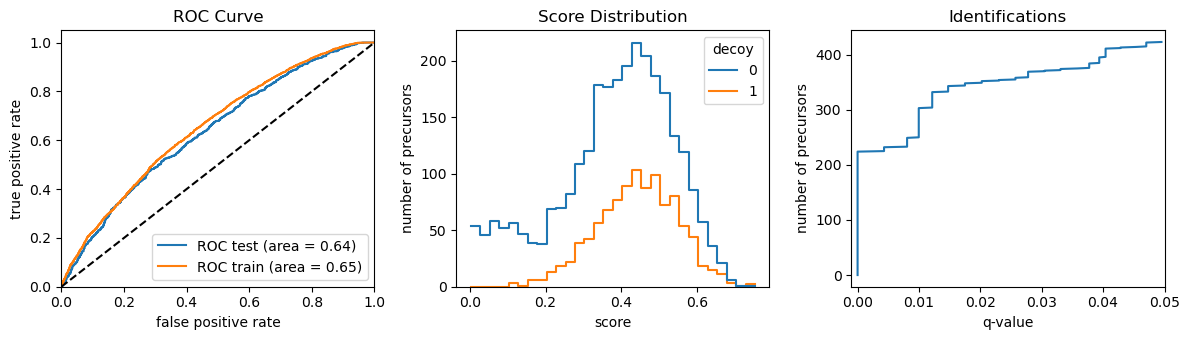

0:32:27.902628  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:32:27.903021  PROGRESS: Accumulated precursors: 3,839, 0.01 FDR: 304, 0.001 FDR: 225
0:32:27.903389  PROGRESS: === Epoch 2, step 1, extracting elution groups 4000 to 8000 ===
0:32:27.905962  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:32:34.453321  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:32:34.453708  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:32:34.453940  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:32:34.454130  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 13875/13875 [00:01<00:00, 13018.18it/s]
0:32:54.035266  INFO: Scored 13875 candidates
0:32:54.039512  INFO: 4.31% of targets failed, 9.37% of decoys failed
0:32:54.118542  INFO: number of dfs in features: 2, total number of features: 25786


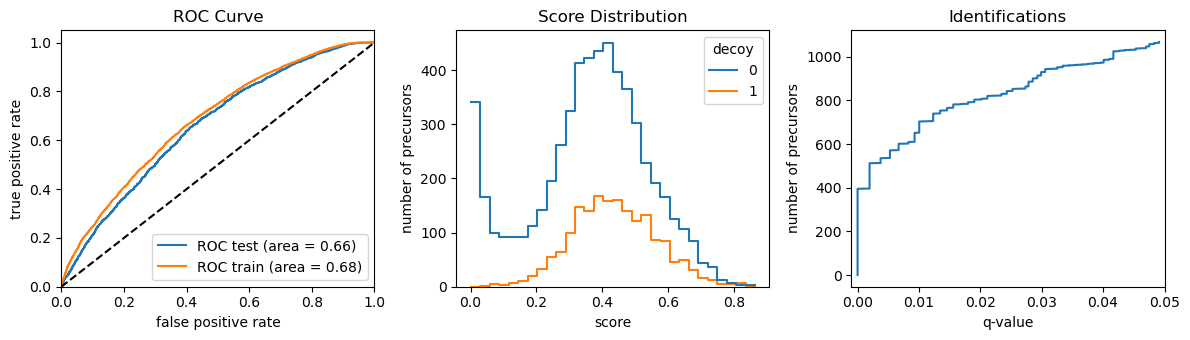

0:32:55.212097  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:32:55.214811  PROGRESS: Accumulated precursors: 7,512, 0.01 FDR: 652, 0.001 FDR: 396
0:32:55.215909  PROGRESS: === Epoch 2, step 2, extracting elution groups 8000 to 12000 ===
0:32:55.221230  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:33:01.734687  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:33:01.735083  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:33:01.735275  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:33:01.735481  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 13938/13938 [00:01<00:00, 12960.12it/s]
0:33:21.451304  INFO: Scored 13938 candidates
0:33:21.455498  INFO: 4.63% of targets failed, 9.72% of decoys failed
0:33:21.535994  INFO: number of dfs in features: 3, total number of features: 38727


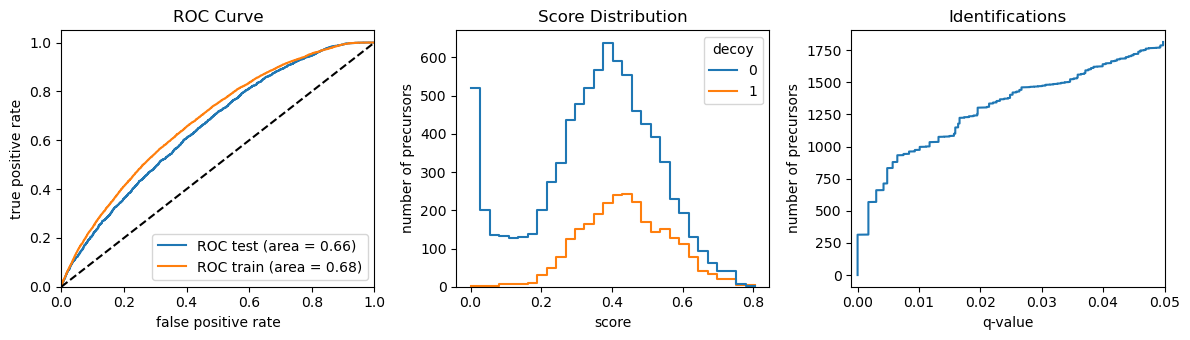

0:33:23.291136  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:33:23.291443  PROGRESS: Accumulated precursors: 11,015, 0.01 FDR: 974, 0.001 FDR: 315
0:33:23.291638  PROGRESS: === Epoch 2, step 3, extracting elution groups 12000 to 16000 ===
0:33:23.294179  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:33:29.864043  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:33:29.864421  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:33:29.864661  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:33:29.864852  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 13974/13974 [00:01<00:00, 13000.98it/s]
0:33:49.632923  INFO: Scored 13974 candidates
0:33:49.637090  INFO: 4.57% of targets failed, 9.40% of decoys failed
0:33:49.720952  INFO: number of dfs in features: 4, total number of features: 51726


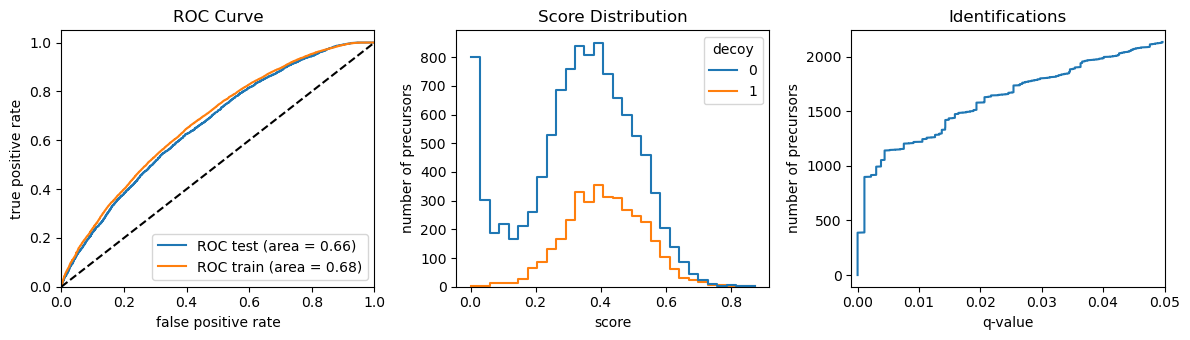

0:33:51.436778  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:33:51.437146  PROGRESS: Accumulated precursors: 14,334, 0.01 FDR: 1,220, 0.001 FDR: 389
0:33:51.437421  PROGRESS: === Epoch 2, step 4, extracting elution groups 16000 to 24000 ===
0:33:51.440414  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:33:58.013646  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:33:58.014056  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:33:58.014244  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:33:58.014474  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
100%|██████████| 27286/27286 [00:02<00:00, 13100.26it/s]
0:34:36.569471  INFO: Scored 27286 candidates
0:34:36.576580  INFO: 4.75% of targets failed, 10.24% of decoys failed
0:34:36.737988  INFO: number of dfs in features: 5, total number of features: 76969


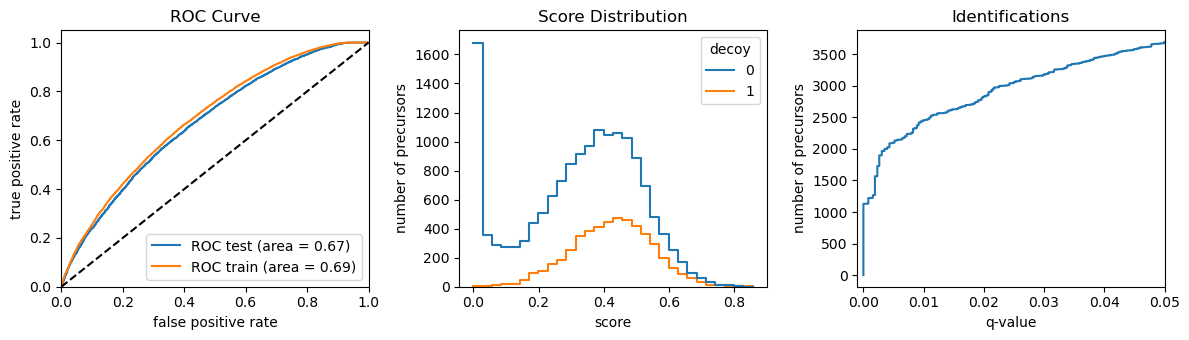

0:34:40.796788  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:34:40.797155  PROGRESS: Accumulated precursors: 20,519, 0.01 FDR: 2,454, 0.001 FDR: 1,223
0:34:40.797971  INFO: calibration group: precursor, fitting mz estimator 


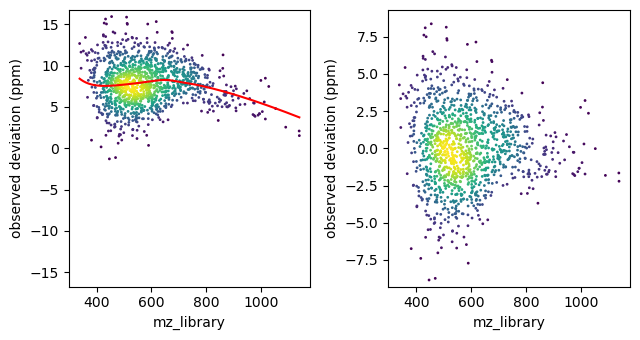

0:34:40.905523  INFO: calibration group: precursor, fitting rt estimator 


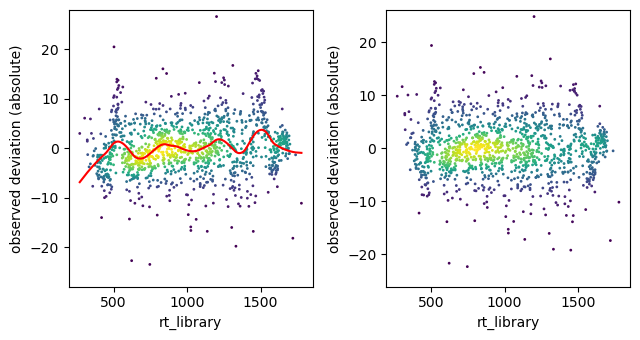

0:34:41.008034  INFO: calibration group: precursor, fitting mobility estimator 


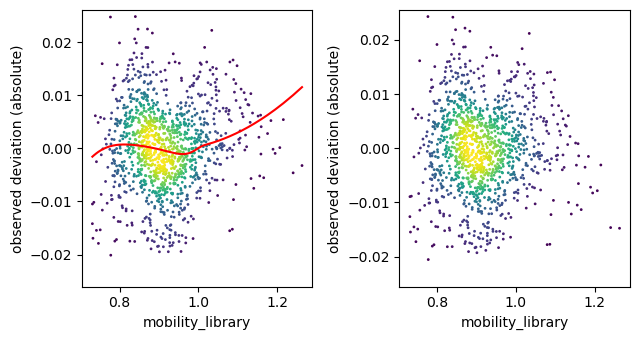

0:34:41.116949  INFO: calibration group: fragment, fitting mz estimator 


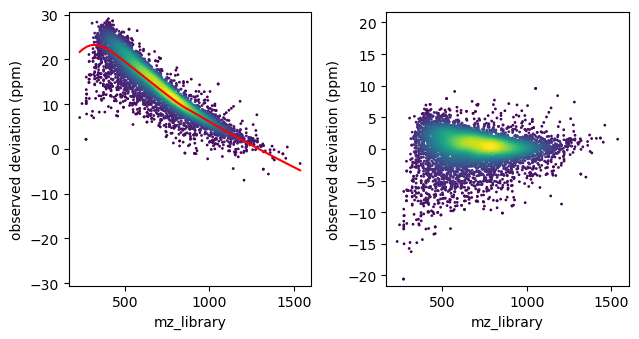

0:34:41.645288  INFO: calibration group: precursor, predicting mz
0:34:41.655269  INFO: calibration group: precursor, predicting rt
0:34:41.685065  INFO: calibration group: precursor, predicting mobility
0:34:41.697292  INFO: calibration group: fragment, predicting mz
0:34:42.034619  PROGRESS: === Epoch 3, step 0, extracting elution groups 0 to 4000 ===
0:34:42.039125  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:34:49.346064  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:34:49.346500  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:34:49.346723  INFO: Expected peak length in RT is 10.00 seconds, sigma is 5.21
0:34:49.346923  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20
 11%|█         | 876/7826 [00:00<00:05, 1259.49it/s]

In [37]:
plan.config['extraction']['HybridCandidateConfig']['max_cardinality'] = 1
plan.config['extraction']['initial_rt_tolerance'] = 30
plan.config['extraction']['initial_mobility_tolerance'] = 0.03
workflow_new = Workflow(
    plan.config, 
    dia_data, 
    precursors_d4, 
    fragments_flat
)

workflow_new.calibration()

In [2]:
fragments_flat

NameError: name 'fragments_flat' is not defined

In [6]:

from alphadia.extraction import hybridselection



In [10]:
import time

performance = []

for mobility_window in [0.02, 0.03, 0.04, 0.05]:
    for rt_window in [10, 20, 30, 45, 60, 90, 120, 150, 180, 200, 250]:

        for i in range(10):

            config = hybridselection.HybridCandidateConfig()
            config.update({
                'rt_tolerance': rt_window,
                'mz_tolerance': 10.,
                'mobility_tolerance': mobility_window,
                'sigma_scale_rt': 0.5,
                'sigma_scale_mobility': 0.8,
                'f_mobility': 1.0,
                'f_rt': 0.95,
                'center_fraction': 0.01,
                'min_size_rt': 3,
                'candidate_count':3
            })

            start_time = time.time()
            selection = hybridselection.HybridCandidateSelection(
                dia_data,
                precursors_flat.sample(1000),
                fragments_flat,
                config.jitclass(),
                rt_tolerance=80,
                mz_tolerance=15,
                mobility_tolerance=0.05,
                candidate_count=1,
                thread_count=10,
                debug=False,
                group_channels=False,
                top_k_precursors=3,
                top_k_fragments=12,
                rt_column='rt_calibrated',
                precursor_mz_column='mz_calibrated',
                fragment_mz_column='mz_library',
                mobility_column='mobility_calibrated'
            )
            candidates = selection()
            stop_time = time.time()

            performance.append({
                'mobility_window': mobility_window,
                'rt_window': rt_window,
                'duration': stop_time - start_time
            })

0:17:21.478089  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:21.478498  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:21.478738  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80
0:17:21.478967  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 18.56
100%|██████████| 999/999 [00:00<00:00, 8618.98it/s]
0:17:22.089936  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:22.090487  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:22.090732  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80
0:17:22.090960  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 18.56
100%|██████████| 999/999 [00:00<00:00, 10741.94it/s]
0:17:22.487150  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:22.487524  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:22.487759  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80

In [17]:
performance_df = pd.DataFrame(performance)
path = '/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/slide_decks/2023_04_18_Borgwardt_Symposium/raw_data'

performance_df.to_csv(os.path.join(path, 'performance.tsv'), index=False, sep='\t')


In [22]:
performance_df['it/s'] = 1000 / performance_df['duration']
performance_df['mobility_window'] = performance_df['mobility_window']*2
performance_df['rt_window'] = performance_df['rt_window']*2

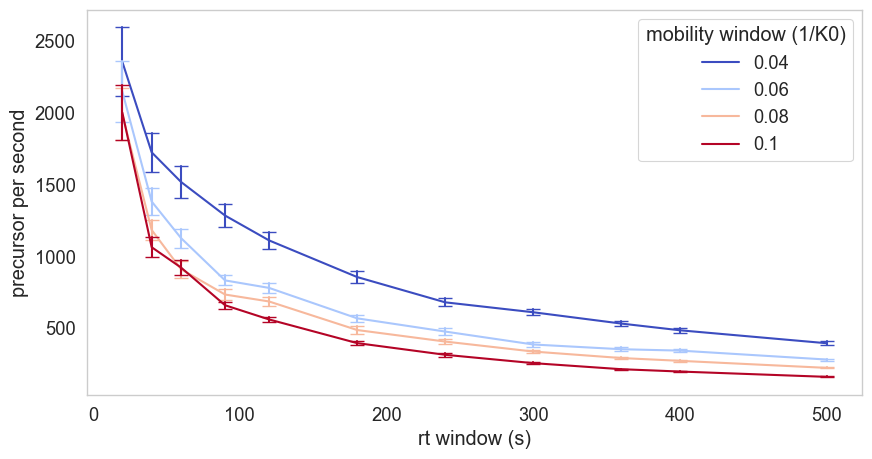

In [42]:
# plot the datapoints with error bars in seaborn
# remove the grid style
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=performance_df,
    x="rt_window",
    y="it/s",
    hue="mobility_window",
    err_style="bars", 
    errorbar=("se", 2),
    err_kws={'capsize':5},
    palette='coolwarm'
)
ax.set_xlabel('rt window (s)')
ax.set_ylabel('precursor per second')
plt.legend(title='mobility window (1/K0)')

fig.savefig(os.path.join(path, 'performance.png'), bbox_inches='tight', dpi=300)


In [15]:
size = 256*128
mflops = 4500

In [16]:
2*mflops/(5*size*np.log2(size))

0.003662109375

In [59]:
gaussian_filter = hybridselection.GaussianFilter(
            dia_data,
            kernel_size=20
        )

4:24:13.931934  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
4:24:13.932534  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
4:24:13.932885  INFO: Expected peak length in RT is 10.00 seconds, sigma is 3.61
4:24:13.933089  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20


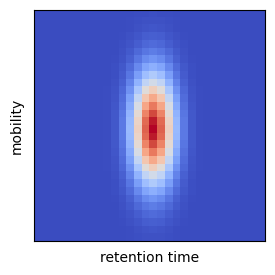

In [67]:


kernel = gaussian_filter.get_kernel()

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(kernel, cmap='coolwarm', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.ylabel('mobility')
plt.xlabel('retention time')
fig.savefig(f'{path}/kernel.png', dpi=300)
plt.show()

In [36]:
features = []
decoy = []
rank = []
pidx = []

for eg in candidates:
    for c in eg.candidates:
        features.append(c.features)
        decoy.append(c.decoy)
        rank.append(c.rank)
        pidx.append(c.precursor_idx)
        
features = np.array(features)
decoy = np.array(decoy)
rank = np.array(rank)
pidx = np.array(pidx)

In [37]:
max_pidx = pidx.max()
candidate = pidx + max_pidx * rank

In [38]:
df = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_07_v1.0.2/HeLa full proteome/alpha_psms.tsv', sep='\t')

In [39]:
candidate_df = df['precursor_idx'].values + max_pidx * df['rank'].values

In [40]:
#mask = np.isin(candidate, candidate_df)

In [58]:
np.float_

numpy.float64

In [41]:
features_masked = features#[mask]
decoy_masked = decoy#[mask]
rank_masked = rank#[mask]
pidx_masked = pidx#[mask]


In [42]:
qval_mask = np.isin(pidx_masked, df[df['qval'] < 0.01]['precursor_idx'].values)

In [35]:
pidx_masked

array([330413, 330406, 287908, ..., 113298, 162935, 287896])

In [34]:
qval_mask.shape

(58193,)

In [43]:
qval_mask.sum()
len(qval_mask)

2088871

In [25]:
decoy.sum()

1039254

1307970


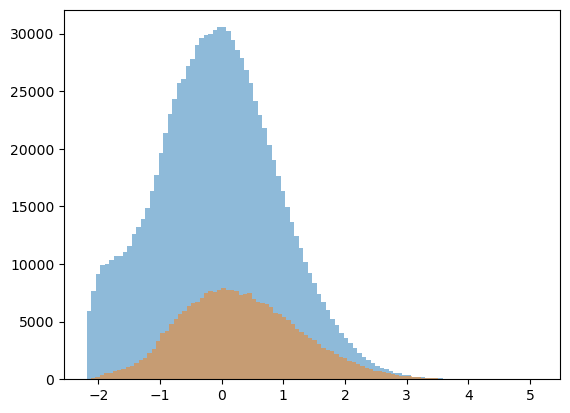

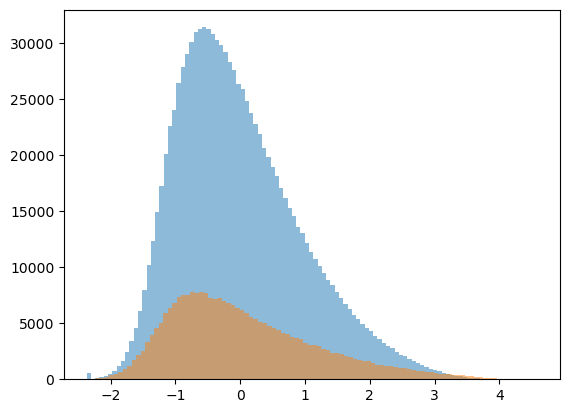

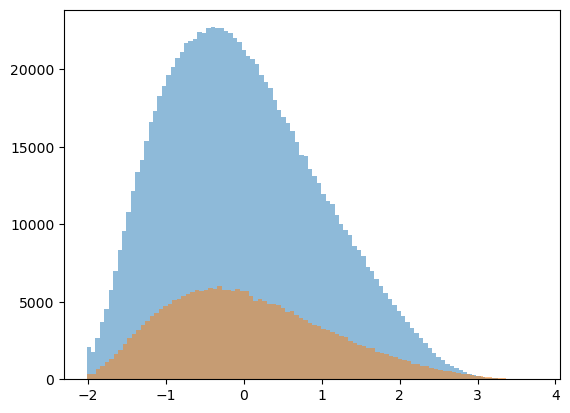

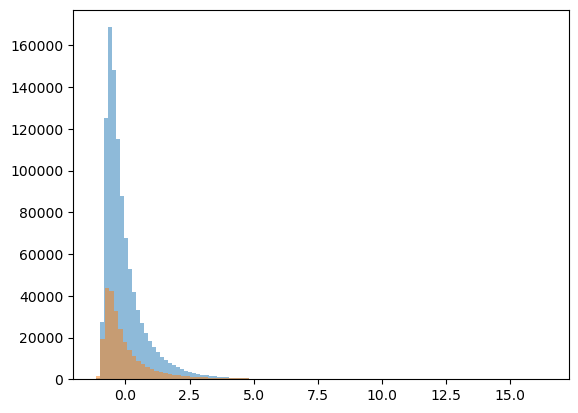

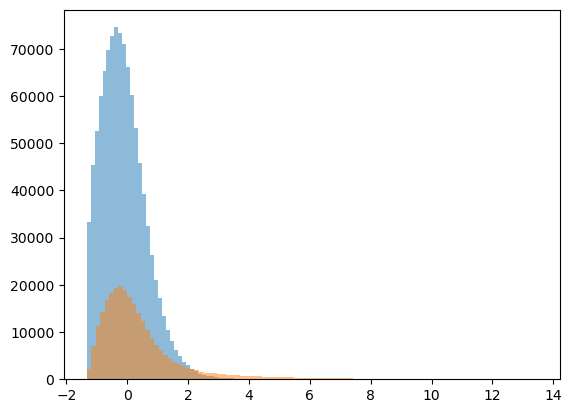

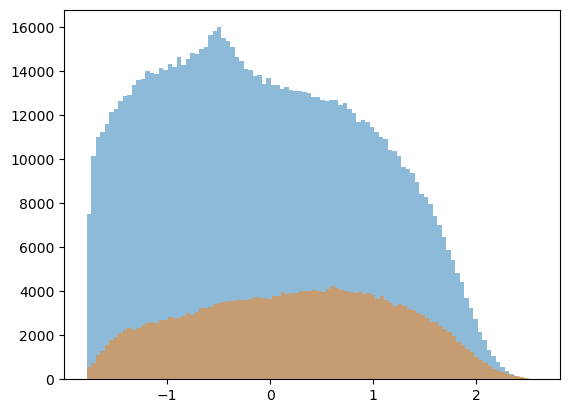

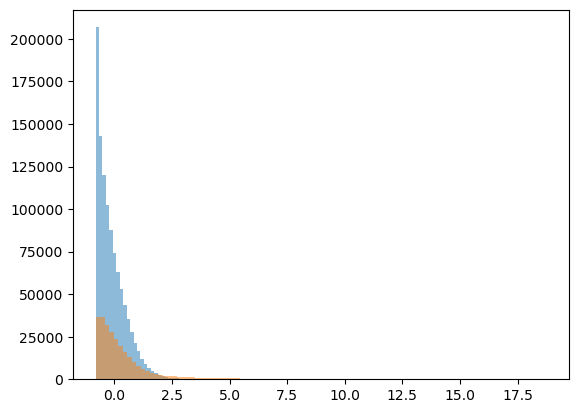

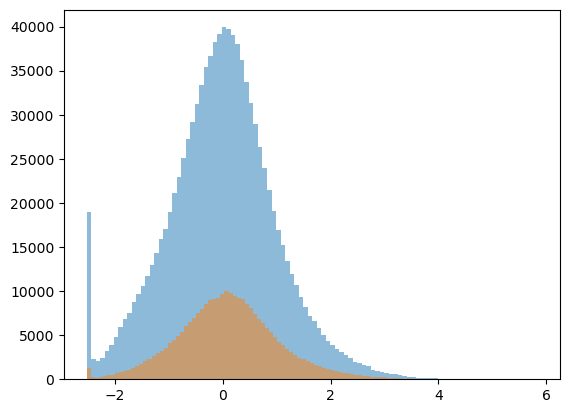

KeyboardInterrupt: 

In [45]:
from sklearn.linear_model import LogisticRegression


def train_classifier(features, decoy, qval_mask):
    # keep all decoys and targets within the qval mask
    to_keep = np.logical_or(decoy, qval_mask)
    features = features[to_keep]
    decoy = decoy[to_keep].astype(bool)

    print(len(features))

    mean = features.mean(axis=0, keepdims=True)
    std = features.std(axis=0, keepdims=True)

    # normalize features
    features = (features - mean)/std

    for i in range(features.shape[1]):
        plt.hist(features[decoy, i], bins=100, alpha=0.5, label='decoy')
        plt.hist(features[~decoy, i], bins=100, alpha=0.5, label='target')
        plt.show()

    # invert the decoy column
    decoy = ~decoy

    lr = LogisticRegression()
    lr.fit(features, decoy)
    print(lr.score(features, decoy))

    # print lr coefficients
    print(mean)
    print(std)
    print(lr.coef_)
    print(lr.intercept_)

train_classifier(features_masked, decoy_masked, qval_mask)


In [ ]:
0.7719351416881346
[[ 2.967344    1.2160938   1.426444   13.960179    0.06620345  0.44364494
   0.03138363  3.1453438 ]]
[[ 1.2583724   0.91052234  1.2126098  14.557817    0.04327635  0.24623954
   0.03225865  1.2671406 ]]
[[ 0.43898424  0.97879761  0.72262148 -0.22705527 -0.21353988  0.3174245
   0.30102549  0.44892641]]
[-0.22941813]

In [110]:
features_masked[:,3] = np.log(features_masked[:,3]+0.0001)
features_masked[:,4] = np.log(features_masked[:,4]+0.0001)

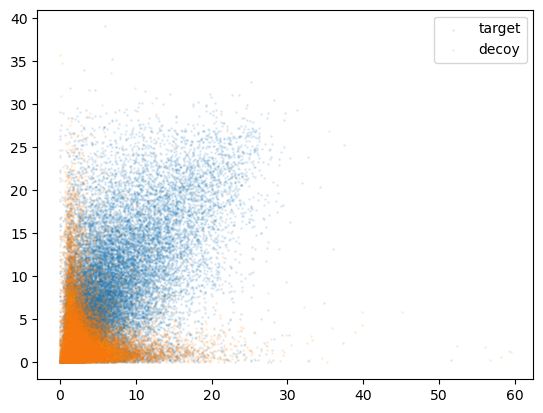

In [143]:
plt.scatter(features_masked[decoy_masked == 0,1], features_masked[decoy_masked == 0,6], label='target', alpha=0.1, s=1)
plt.scatter(features_masked[decoy_masked == 1,1], features_masked[decoy_masked == 1,6], label='decoy', alpha=0.1, s=1)
plt.legend()

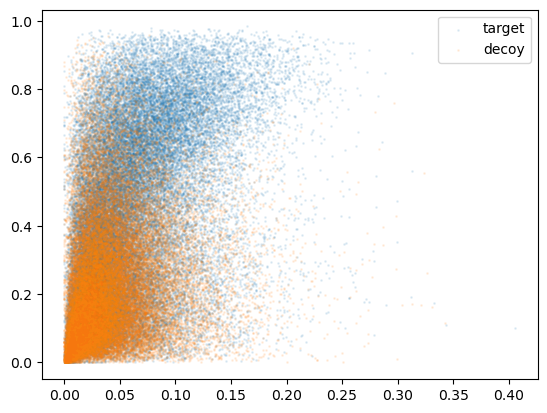

In [112]:
plt.scatter(features_masked[decoy_masked == 0,2], features_masked[decoy_masked == 0,7], label='target', alpha=0.1, s=1)
plt.scatter(features_masked[decoy_masked == 1,2], features_masked[decoy_masked == 1,7], label='decoy', alpha=0.1, s=1)
plt.legend()

(array([9.400e+01, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 6.000e+00,
        3.000e+00, 8.000e+00, 6.000e+00, 5.000e+00, 1.100e+01, 9.000e+00,
        1.000e+01, 1.900e+01, 1.400e+01, 2.700e+01, 2.400e+01, 2.300e+01,
        2.000e+01, 4.200e+01, 5.200e+01, 4.000e+01, 7.000e+01, 6.500e+01,
        9.200e+01, 1.090e+02, 1.640e+02, 1.730e+02, 1.750e+02, 2.730e+02,
        3.100e+02, 3.620e+02, 4.590e+02, 5.290e+02, 6.800e+02, 7.320e+02,
        9.150e+02, 1.063e+03, 1.318e+03, 1.451e+03, 1.692e+03, 1.928e+03,
        2.043e+03, 2.197e+03, 2.228e+03, 2.228e+03, 2.273e+03, 2.162e+03,
        2.125e+03, 1.793e+03, 1.773e+03, 1.569e+03, 1.396e+03, 1.252e+03,
        1.122e+03, 9.850e+02, 8.450e+02, 6.870e+02, 6.350e+02, 5.230e+02,
        4.510e+02, 3.550e+02, 3.250e+02, 2.470e+02, 1.930e+02, 1.630e+02,
        1.410e+02, 8.500e+01, 8.300e+0

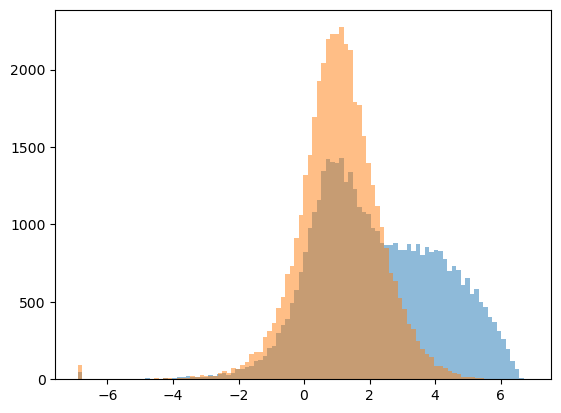

In [113]:
int_diff = np.log((features_masked[:,1] * features_masked[:,6])+0.001)
plt.hist(int_diff[decoy_masked == 0], bins=100, label='target', alpha=0.5)
plt.hist(int_diff[decoy_masked == 1], bins=100, label='decoy', alpha=0.5)

(array([178.,  83.,  53.,  49.,  59.,  58.,  59.,  59.,  52.,  63.,  41.,
         63.,  52.,  57.,  67.,  68.,  50.,  81.,  61.,  58.,  64.,  72.,
         71.,  81.,  84.,  82.,  69.,  76.,  82.,  97.,  81.,  70.,  94.,
         87., 104., 102., 116., 112., 100., 122.,  99.,  95., 104.,  91.,
         87.,  92., 109., 106.,  94., 103., 100., 101.,  83., 111.,  94.,
         91.,  92.,  79.,  76.,  79.,  56.,  61.,  64.,  66.,  55.,  59.,
         45.,  51.,  39.,  32.,  32.,  29.,  25.,  22.,  22.,  19.,  11.,
         12.,   9.,  12.,   9.,   8.,  10.,   3.,   4.,   3.,   5.,   5.,
          0.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-6.9077554, -6.854499 , -6.8012424, -6.7479854, -6.694729 ,
        -6.6414723, -6.588216 , -6.534959 , -6.4817023, -6.428446 ,
        -6.3751893, -6.3219323, -6.268676 , -6.2154193, -6.162163 ,
        -6.108906 , -6.0556493, -6.002393 , -5.9491363, -5.8958793,
        -5.8426228, -5.7893662, -5.7361097, -5

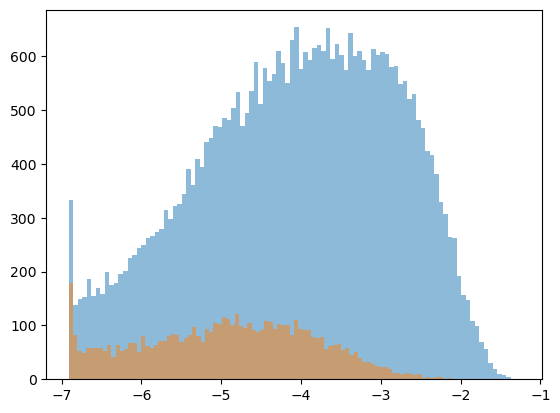

In [93]:
int_diff = np.log((features_masked[:,2] * features_masked[:,7])+0.001)
plt.hist(int_diff[decoy_masked == 0], bins=100, label='target', alpha=0.5)
plt.hist(int_diff[decoy_masked == 1], bins=100, label='decoy', alpha=0.5)

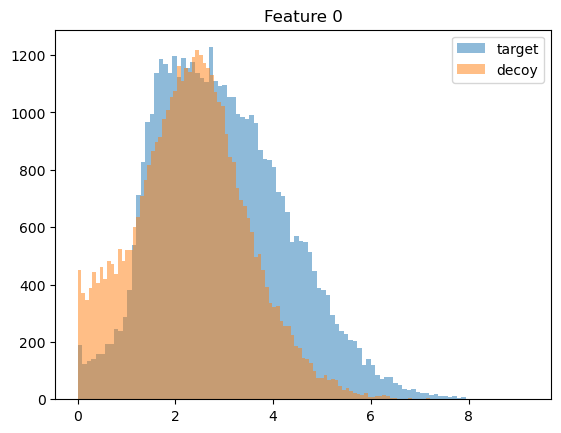

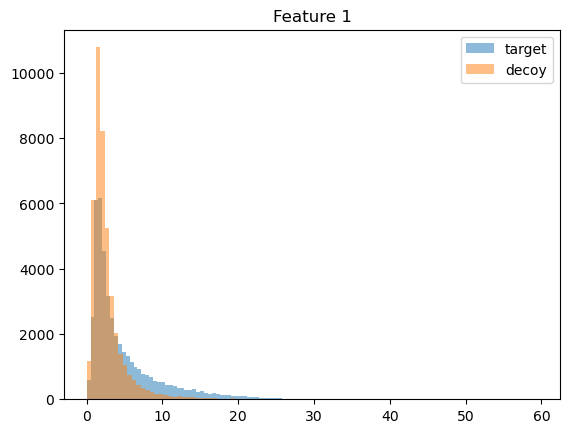

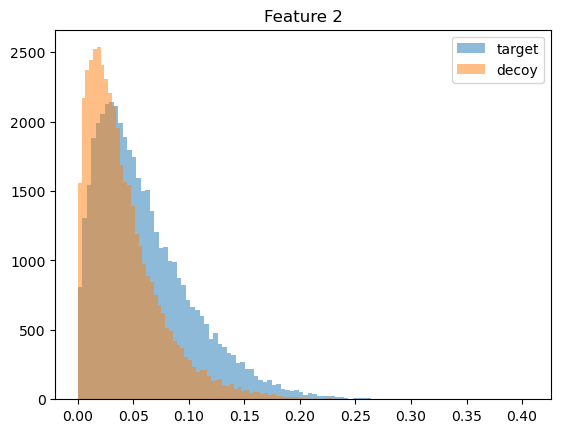

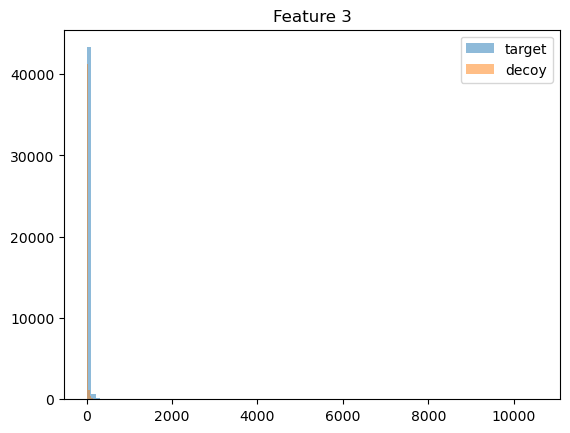

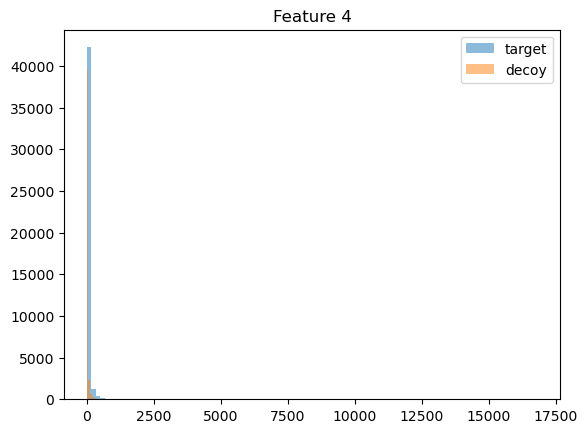

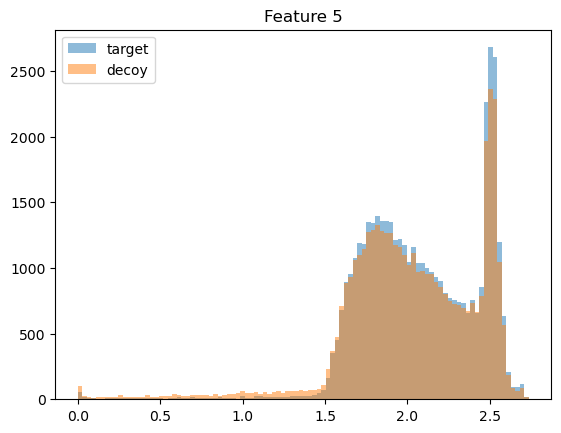

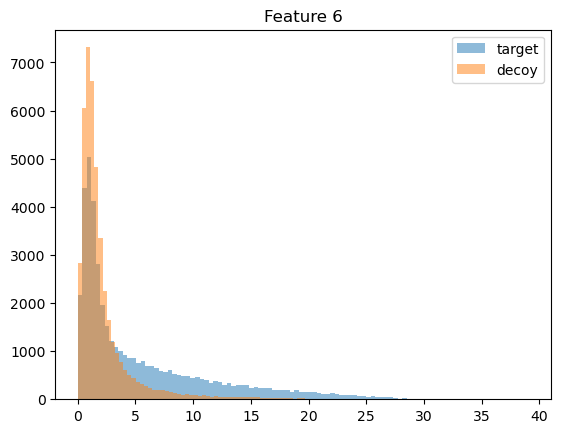

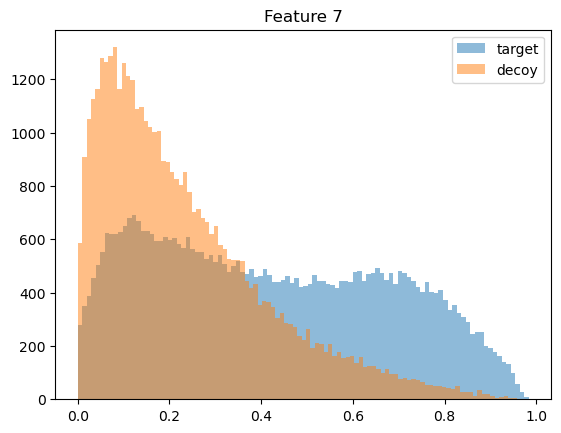

In [146]:
for i in range(features_masked.shape[1]):
    plt.figure()
    plt.hist(features_masked[decoy_masked == 0, i], label='target', bins=100, alpha=0.5)
    plt.hist(features_masked[decoy_masked == 1, i], label='decoy', bins=100, alpha=0.5)
    plt.legend()
    plt.title(f'Feature {i}')

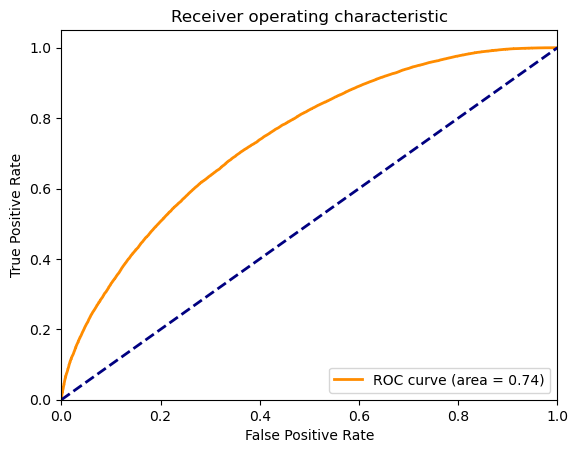

In [95]:
# train and validate a logistic regression model based on the features and decoy labels
from sklearn.linear_model import LogisticRegression
# MLP calssifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features_masked, decoy_masked, test_size=0.2, random_state=42)

sr = StandardScaler()
lr = MLPClassifier()

X_train = sr.fit_transform(X_train)
X_test = sr.transform(X_test)


lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

# evaluiate the model by plotting the score distribution for the two classes (decoy and target)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
print(features.shape)

(414938, 8)


  0%|          | 0/2 [00:00<?, ?it/s]

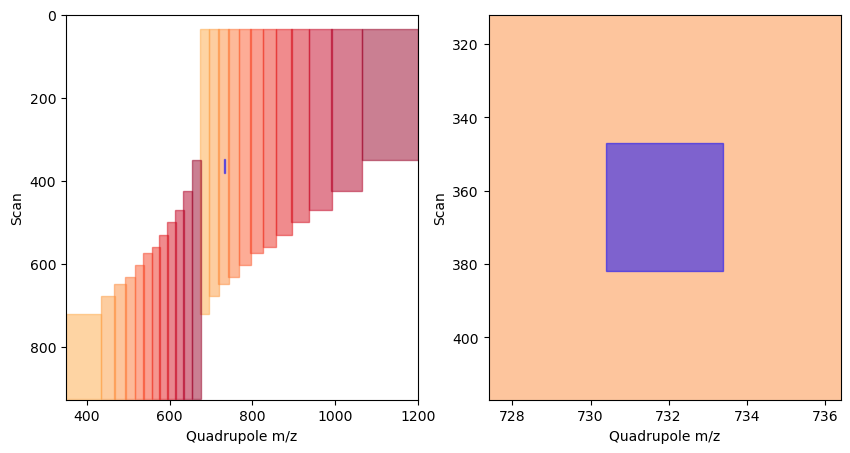

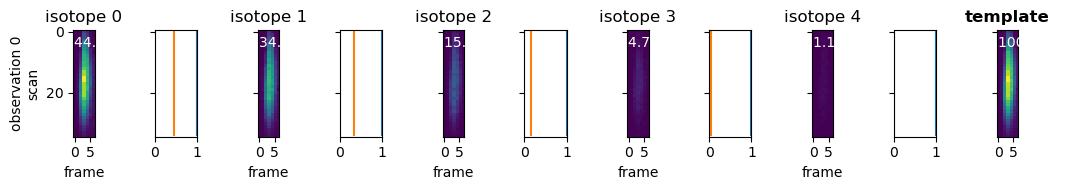

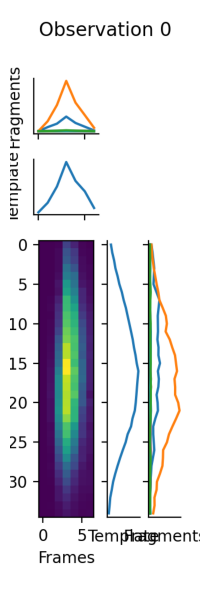

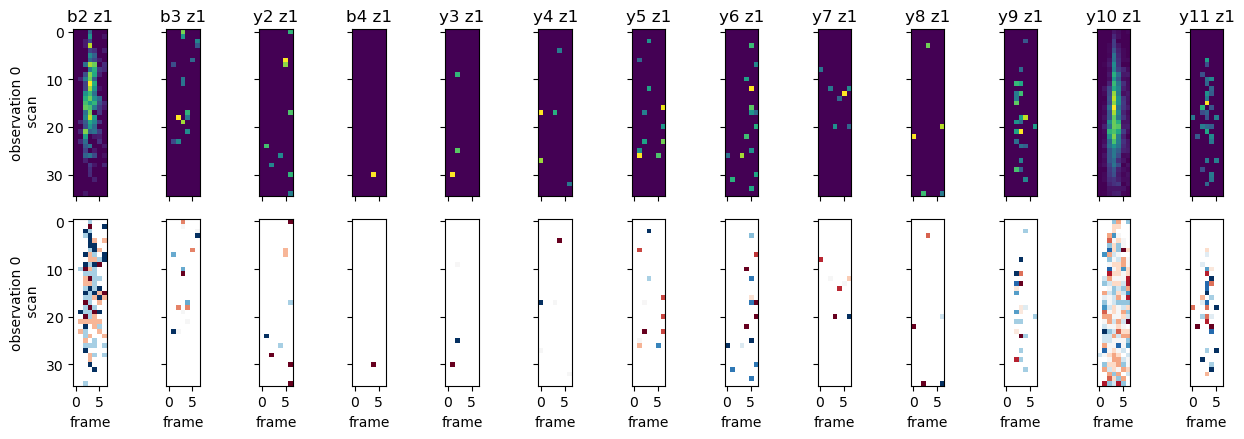

 50%|█████     | 1/2 [00:01<00:01,  1.28s/it]

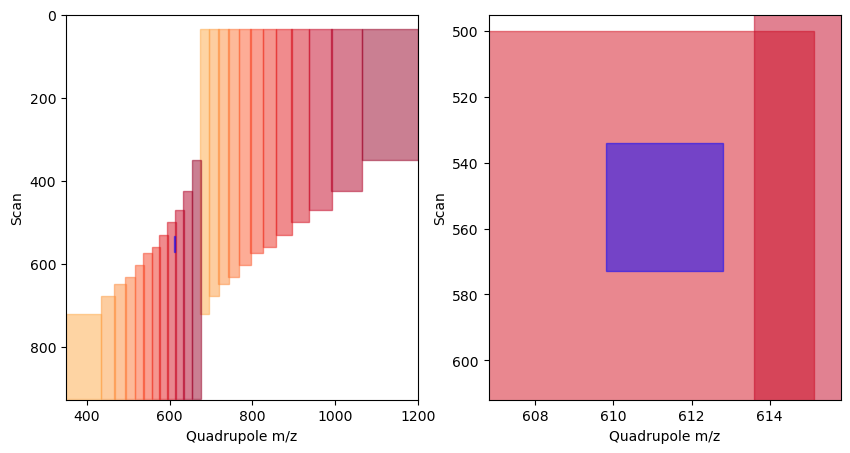

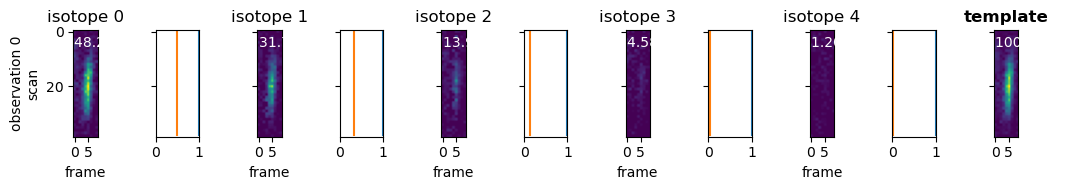

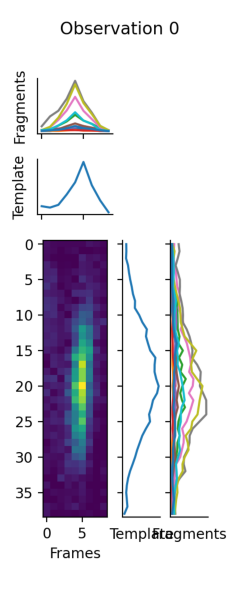

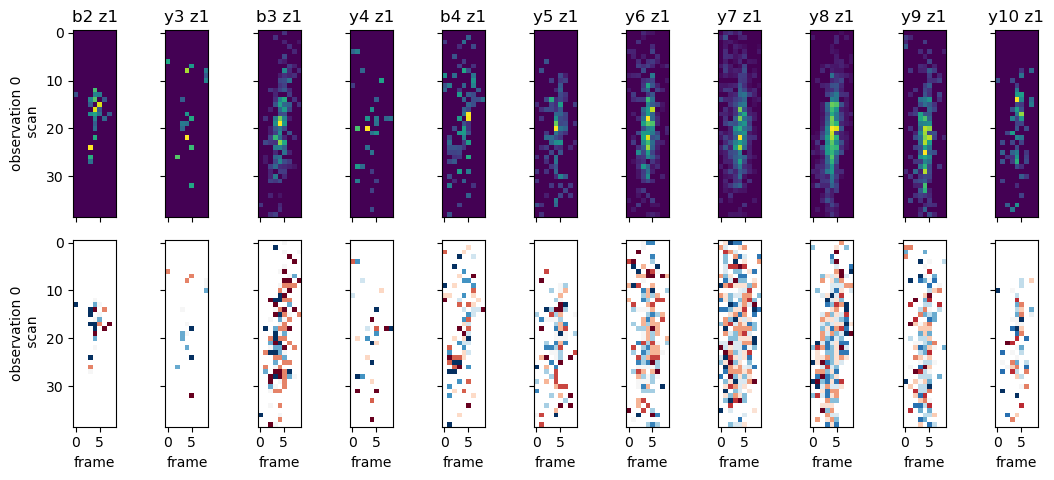

100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


In [119]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

candidates['mz'] = candidates['precursor_mz']

workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    fragment_mz_column='mz_calibrated',
    debug=True
)
psm = workflow()

In [111]:
psm

(   precursor_idx  elution_group_idx  charge  rank  precursor_mass_error  \
 0         230714                  2       2     0              2.743231   
 1         230714                  2       2     1              0.014830   
 2         230714                  2       2     2             -2.404601   
 3         230714                  2       2     3              1.964307   
 4         230715              76109       2     0              0.623978   
 5         230715              76109       2     1              0.971404   
 6         230715              76109       2     2              0.821897   
 7         230715              76109       2     3             -3.377354   
 8         230715              76109       2     4             -3.446375   
 
    mz_library  mz_observed  precursor_isotope_correlation  \
 0  730.896440   730.898438                       0.999893   
 1  730.896440   730.896423                       0.495449   
 2  730.896440   730.894653                       0.